# Homework 2

## Pair Programming Group Number: FILL IN HERE
## Members of Team: Hyeon Gu Kim

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [1]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

Text(0.5, 1.0, 'Discrete PDF of 1000 Random Samples')

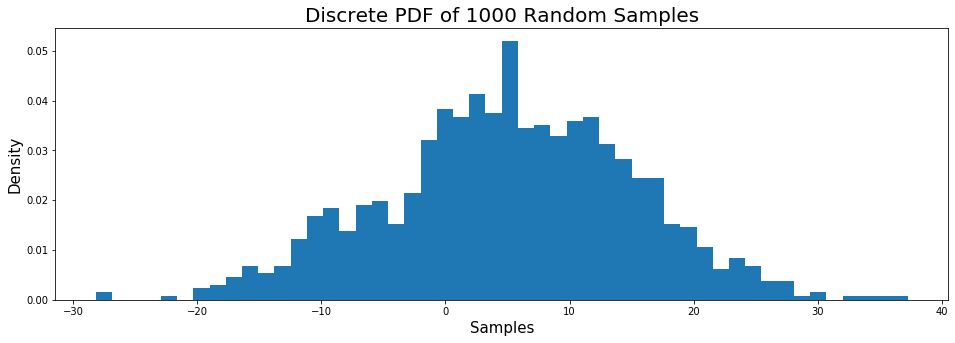

In [2]:
v = np.random.normal(loc=5, scale=10, size=1000)

plt.figure(figsize=(16,5))
plt.hist(v, bins=50, density=True)
plt.xlabel("Samples", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.title("Discrete PDF of 1000 Random Samples", fontsize=20)

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  If can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

Text(0.5, 1.0, 'Discrete CDF of 1000 Random Samples')

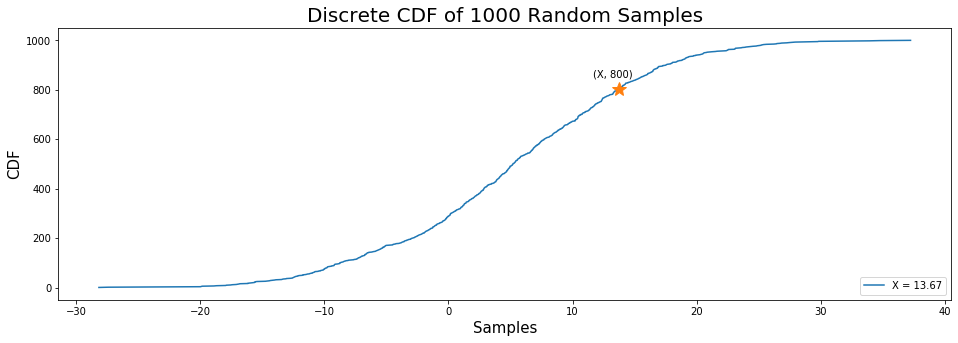

In [3]:
v2 = pd.DataFrame(v, columns=['Samples'])
v2_cdf = v2['Samples'].value_counts().sort_index().cumsum()
x = list(v2_cdf.index)[800]
y = list(v2_cdf.values)[800]


plt.figure(figsize=(16,5))
plt.plot(v2_cdf, linestyle="-")
plt.plot(v2_cdf, linestyle="", marker="*", markevery=[y], markersize=15)
plt.text(x-2, y+50, "(X, 800)")
plt.legend(["X = " + format(x, ".2f")], loc="lower right")
plt.xlabel("Samples", fontsize=15)
plt.ylabel("CDF", fontsize=15)
plt.title("Discrete CDF of 1000 Random Samples", fontsize=20)

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

Text(0, 0.5, 'Price')

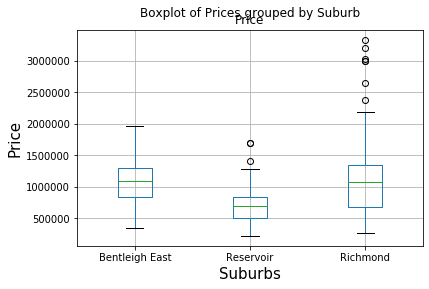

In [4]:
data = pd.read_csv("melb_data.csv")
suburb_df = data[data['Suburb'].isin(["Reservoir", "Richmond", "Bentleigh East"])]
suburb_df.boxplot(column="Price", by="Suburb")
plt.suptitle('Boxplot of Prices grouped by Suburb')
plt.xlabel("Suburbs", fontsize=15)
plt.ylabel("Price", fontsize=15)

## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

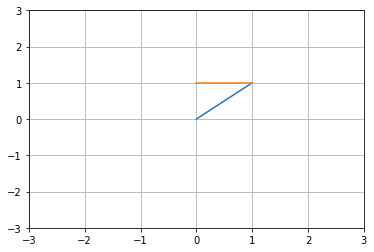

In [5]:
a = np.array([[0,0], 
              [1,1]])
b = np.array([[1,1], 
              [0,1]])

ax1, ax2 = a[0][0], a[1][0]
ay1, ay2 = a[0][1], a[1][1]

bx1, bx2 = b[0][0], b[1][0]
by1, by2 = b[0][1], b[1][1]

plt.plot([ax1, ax2], [ay1, ay2])
plt.plot([bx1, bx2], [by1, by2])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid()

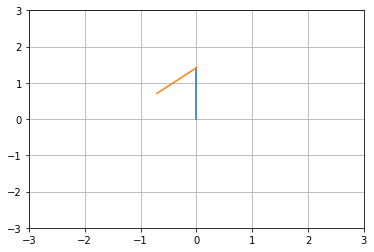

In [6]:
r = 45 * (np.pi/180)
rr = np.array([[np.cos(r), -np.sin(r)], 
               [np.sin(r), np.cos(r)]])
#m2 = np.matmul(rr, b)
a1 = a[0]
a2 = a[1]
b1 = b[0]
b2 = b[1]

m1 = np.matmul(rr, a1)
m2 = np.matmul(rr, a2)
m3 = np.matmul(rr, b1)
m4 = np.matmul(rr, b2)

plt.plot([m1[0], m2[0]], [m1[1], m2[1]])
plt.plot([m3[0], m4[0]], [m3[1], m4[1]])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid()

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [7]:
A = np.array([[2,1,1], [4,-6, 0], [-2, 7, 2]])
b = np.array([5,-2,9])
b = b.reshape(3,1)

In [8]:
np.matmul(np.linalg.inv(A), b)

array([[1.],
       [1.],
       [2.]])